In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date)).first()
most_recent

('2017-08-23',)

Text(0, 0.5, 'Inches')

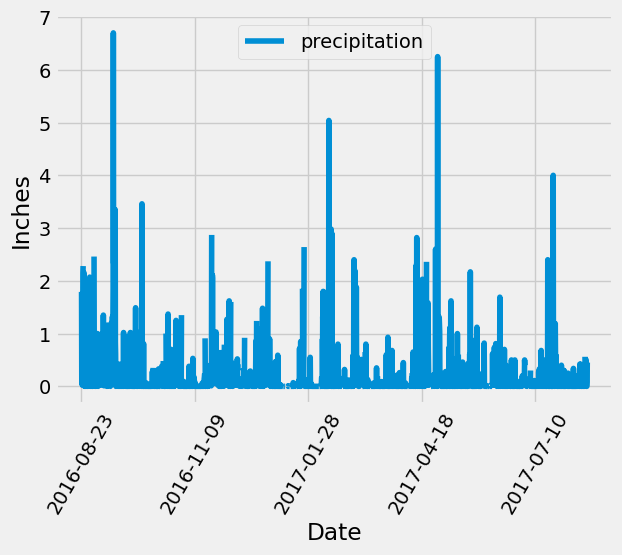

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns =['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=60)
plt.xlabel("Date")
plt.ylabel("Inches")
# Use Pandas Plotting with Matplotlib to plot the data
#plt.figure(figsize=(12, 6))
#plt.plot(df['date'], df['precipitation'])
#plt.xlabel('dates')
#plt.ylabel('precipitation (inches)')
#plt.title('Last 12 Months of Precipitation Data')
#plt.xticks(rotation=45)
#plt.grid(True)
#plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2230 non-null   object 
 1   precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.3+ KB


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
query = "SELECT count(id) FROM station"

with engine.connect() as conn: print(conn.execute(text(query)).fetchall())

[(9,)]


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = """
    SELECT 
        station, 
        count(*) as count_rows
    FROM
        measurement
    GROUP BY 
        station
    ORDER BY count_rows DESC;
"""

df = pd.read_sql(text(query), con=engine)
df.head()

,station,count_rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
    SELECT
        date,
        station,
        tobs
    FROM measurement
    WHERE
        date >= '2016-08-23'
        AND
        station = 'USC00519281'
    ORDER BY date;
"""

df2 = pd.read_sql(text(query), con=engine)
df2.head()


,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


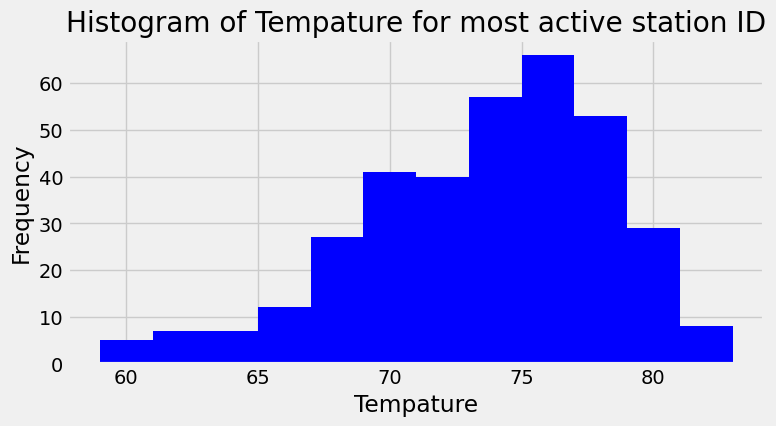

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(8,4))
plt.hist(df2['tobs'], color="blue", bins = 12)
plt.ylabel("Frequency")
plt.xlabel("Tempature")
plt.title("Histogram of Tempature for most active station ID")
plt.show()


# Close Session

In [17]:
# Close Session
session.close()